In [1]:
import numpy as np
import math

In [2]:
def log_prob(x, mu1, cov1, mu2, cov2, n1, n2):
    diff1 = x - mu1
    diff2 = x - mu2
    exp_arg1 = - 0.5 * np.dot(diff1, np.linalg.solve(cov1, diff1))
    exp_arg2 =  - 0.5 * np.dot(diff2, np.linalg.solve(cov2, diff2))
    distr1 = n1 * math.pow((2 * np.pi), -len(mu1)/2) / np.sqrt(np.linalg.det(cov1)) * np.exp(exp_arg1)
    distr2 = n2 * math.pow((2 * np.pi), -len(mu2)/2) / np.sqrt(np.linalg.det(cov2)) * np.exp(exp_arg2)
    return np.log(distr1 + distr2)

In [3]:
ndim = 1

np.random.seed(42)
# means1 = np.random.rand(ndim)
# means2 = np.random.rand(ndim) * 10

# n1 = np.random.rand(ndim)
# n2 = np.random.rand(ndim)


means1 = np.array([0.])
means2 = np.array([20.])

n1 = np.array([10.])
n2 = np.array([10.])

# cov1 = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
# cov1 = np.triu(cov1)
# cov1 += cov1.T - np.diag(cov1.diagonal())
# cov1 = np.dot(cov1, cov1)

# cov2 = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
# cov2 = np.triu(cov2)
# cov2 += cov2.T - np.diag(cov2.diagonal())
# cov2 = np.dot(cov2, cov2)

cov1 = np.array([[1.]])
cov2 = np.array([[1.]])

In [4]:
nwalkers = 1000
p0 = np.random.rand(nwalkers, ndim)

In [61]:
import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, moves=emcee.moves.DESnookerMove(), args=[means1, cov1, means2, cov2, n1, n2])

In [62]:
sampler.run_mcmc(p0, 3000);

/Users/ta_nyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


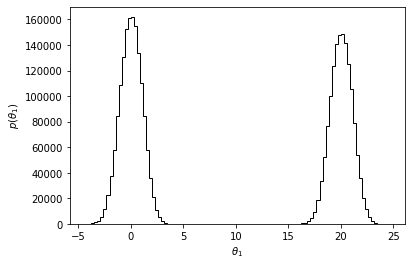

In [63]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$");
plt.savefig("multimodal_sampled.png")

In [64]:
def real_distr(x, mu1, cov1, mu2, cov2, n1, n2):
    diff1 = x - mu1
    diff2 = x - mu2
    exp_arg1 = - 0.5 * np.dot(diff1, np.linalg.solve(cov1, diff1))
    exp_arg2 =  - 0.5 * np.dot(diff2, np.linalg.solve(cov2, diff2))
    distr1 = n1 * math.pow((2 * np.pi), -len(mu1)/2) / np.sqrt(np.linalg.det(cov1)) * np.exp(exp_arg1)
    distr2 = n2 * math.pow((2 * np.pi), -len(mu2)/2) / np.sqrt(np.linalg.det(cov2)) * np.exp(exp_arg2)
    return distr1 + distr2

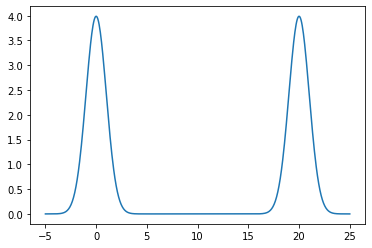

In [65]:
x = np.linspace(-5, 25, 500)
y = [real_distr(x_, means1, cov1, means2, cov2, n1, n2) for x_ in x]
plt.plot(x, y)
plt.savefig("mustimodal_real.png")

In [57]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.945


In [58]:
print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

Mean autocorrelation time: 1.145 steps
